In [12]:
#install.packages("transformr")
library(readxl)
library(tidyverse)
library(transformr)
library(gganimate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [45]:
us.data <- read.csv('us-states.csv')
us.data$date <- as.Date(us.data$date)
us.data <- us.data %>%
            arrange(date) %>%
          #  mutate(cases = cases + seq.int(nrow(us.data))*0.0000001) %>%
            group_by(state) %>%
            mutate(newcases = cases - lag(cases, 1)) %>%
            mutate(smacases = (cases + lag(cases, 1) + lag(cases, 2))/3 ) 
us.data

date,state,fips,cases,deaths,newcases,smacases
<date>,<fct>,<int>,<int>,<int>,<int>,<dbl>
2020-01-21,Washington,53,1,0,NA,NA
2020-01-22,Washington,53,1,0,0,NA
2020-01-23,Washington,53,1,0,0,1.000000
2020-01-24,Illinois,17,1,0,NA,NA
2020-01-24,Washington,53,1,0,0,1.000000
2020-01-25,California,6,1,0,NA,NA
2020-01-25,Illinois,17,1,0,0,NA
2020-01-25,Washington,53,1,0,0,1.000000
2020-01-26,Arizona,4,1,0,NA,NA


In [50]:
p <- ggplot(us.data, aes(x=cases)) +
    geom_line(aes(y=smacases, colour=state)) +
    theme(legend.position="bottom") +
    scale_y_log10(labels = scales::comma) +
    scale_x_log10(labels = scales::comma) +
    labs(x="Cumulative Confirmed Cases", 
         y="New Confirmed Cases (3 day SMA)", 
         title="COVID-19 Confirmed New Cases against Cumulative Cases by US state",
         #subtitle="27th of March 2020",
         caption="Ali Raheem 29/03/2020, data: The New York Times (https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html)") + 
    scale_colour_discrete(name="")

In [48]:
p + transition_time(date) + labs(subtitle="Cumulative Cases: {frame_time}")

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”

Rendering [-------------------------------------------] at 0.88 fps ~ eta:  2m
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”

Rendering [>------------------------------------------] at 0.85 fps ~ eta:  2m
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”

Rendering [>------------------------------------------] at 0.84 fps ~ eta:  2m
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


Rendering [=>-----------------------------------------] at 0.82 fps ~ eta:  2m
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


Rendering [=>-----------------------------------------] at 0.81 fps ~ eta:  2m
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
geom_path: Each group con

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


Rendering [====================>----------------------] at 0.75 fps ~ eta:  1m
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


Rendering [====================>----------------------] at 0.76 fps ~ eta:  1m
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


Rendering [=====================>---------------------] at 0.76 fps ~ eta:  1m
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


Rendering [=====================>---------------------] at 0.75 fps ~ eta:  1m
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


Rendering [======================>--------------------] at 0.76 fps ~ eta:  1m



Rendering [===================================>-------] at 0.76 fps ~ eta: 21s
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


Rendering [====================================>------] at 0.76 fps ~ eta: 20s
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


Rendering [====================================>------] at 0.76 fps ~ eta: 18s
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


Rendering [====================================>------] at 0.76 fps ~ eta: 17s
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


Rendering [=====================================>-----

Warning message:
“Removed 108 row(s) containing missing values (geom_path).”


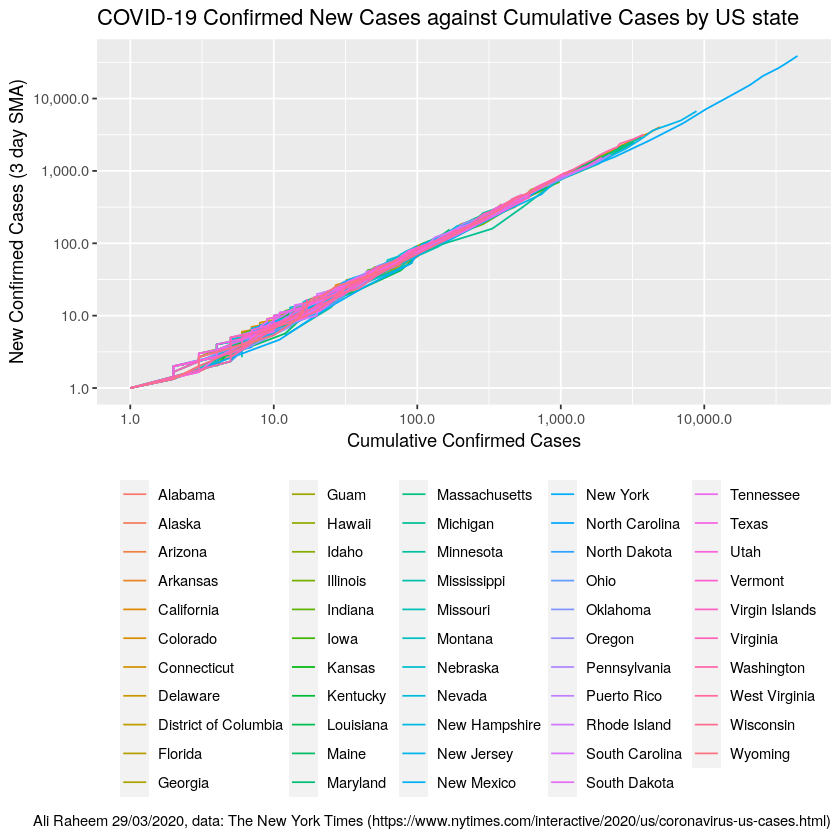

In [51]:
p